In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | grootfontein
Processing Record 7 of Set 1 | ratnagiri
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | virginia beach
Processing Record 11 of Set 1 | tabou
Processing Record 12 of Set 1 | la ronge
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | paso de carrasco
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | hermanus
Processing Record 2

Processing Record 36 of Set 4 | esperance
Processing Record 37 of Set 4 | la macarena
Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | sisimiut
Processing Record 40 of Set 4 | bourail
Processing Record 41 of Set 4 | zhigansk
Processing Record 42 of Set 4 | beloha
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | markala
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | port-cartier
Processing Record 50 of Set 4 | cadillac
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | alta floresta
Processing Record 3 of Set 5 | viligili
City not found. Skipping...
Processing Record 4 of Set 5 | taree
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | lewiston
Processing Record 8 of Set 5 | la 

Processing Record 26 of Set 8 | pochutla
Processing Record 27 of Set 8 | hoa binh
Processing Record 28 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 29 of Set 8 | manaquiri
Processing Record 30 of Set 8 | golden
Processing Record 31 of Set 8 | aasiaat
Processing Record 32 of Set 8 | nandyal
Processing Record 33 of Set 8 | erie
Processing Record 34 of Set 8 | acarau
Processing Record 35 of Set 8 | puerto escondido
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | asfi
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | otavi
Processing Record 43 of Set 8 | te anau
Processing Record 44 of Set 8 | tessalit
Processing Record 45 of Set 8 | abapo
Processing Record 46 of Set 8 | caravelas
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | nogales
Processing Record 49 of Set 8 | manavalakurichi
Process

Processing Record 12 of Set 12 | halifax
Processing Record 13 of Set 12 | boulder city
Processing Record 14 of Set 12 | korem
Processing Record 15 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 16 of Set 12 | miles city
Processing Record 17 of Set 12 | quelimane
Processing Record 18 of Set 12 | tucurui
Processing Record 19 of Set 12 | dayong
Processing Record 20 of Set 12 | paragominas
Processing Record 21 of Set 12 | baboua
City not found. Skipping...
Processing Record 22 of Set 12 | todos santos
Processing Record 23 of Set 12 | orahovac
Processing Record 24 of Set 12 | port hardy
Processing Record 25 of Set 12 | haines junction
Processing Record 26 of Set 12 | makakilo city
Processing Record 27 of Set 12 | coihaique
Processing Record 28 of Set 12 | ganzhou
Processing Record 29 of Set 12 | urubicha
Processing Record 30 of Set 12 | mwandiga
Processing Record 31 of Set 12 | leningradskiy
Processing Record 32 of Set 12 | bereznik
Processing Record 33 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,77.47,48,97,19.55,CV,2022-02-12 23:46:48
1,Rikitea,-23.1203,-134.9692,78.96,71,0,16.82,PF,2022-02-12 23:51:32
2,Puerto Ayora,-0.7393,-90.3518,77.56,89,72,1.99,EC,2022-02-12 23:51:32
3,Ponta Do Sol,32.6667,-17.1000,64.06,71,27,4.61,PT,2022-02-12 23:51:32
4,Cherskiy,68.7500,161.3000,-18.33,97,100,10.29,RU,2022-02-12 23:51:33
5,Grootfontein,-19.5667,18.1167,65.77,94,98,1.14,NA,2022-02-12 23:51:33
6,Ratnagiri,16.9833,73.3000,72.95,56,72,5.06,IN,2022-02-12 23:51:33
7,Mataura,-46.1927,168.8643,53.47,95,100,4.38,NZ,2022-02-12 23:51:33
8,Virginia Beach,36.8529,-75.9780,64.42,52,96,5.70,US,2022-02-12 23:51:34
9,Tabou,4.4230,-7.3528,78.33,87,28,5.91,CI,2022-02-12 23:51:34


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [111]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-02-12 23:46:48,14.8961,-24.4956,77.47,48,97,19.55
1,Rikitea,PF,2022-02-12 23:51:32,-23.1203,-134.9692,78.96,71,0,16.82
2,Puerto Ayora,EC,2022-02-12 23:51:32,-0.7393,-90.3518,77.56,89,72,1.99
3,Ponta Do Sol,PT,2022-02-12 23:51:32,32.6667,-17.1000,64.06,71,27,4.61
4,Cherskiy,RU,2022-02-12 23:51:33,68.7500,161.3000,-18.33,97,100,10.29


In [112]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

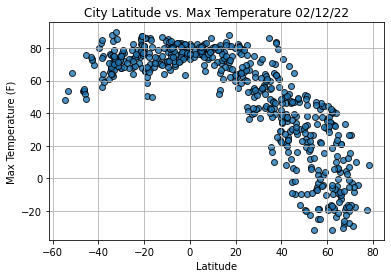

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

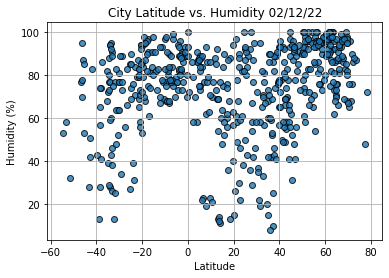

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

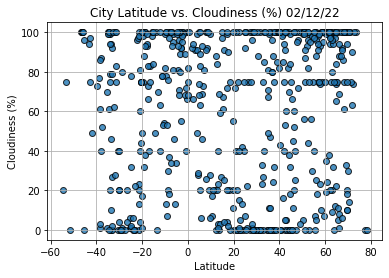

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

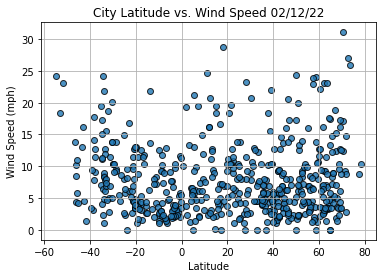

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Lat                      -24.8667
Lng                      113.6333
Max Temp                    82.47
Humidity                       74
Cloudiness                     78
Wind Speed                   5.75
Country                        AU
Date          2022-02-12 23:46:56
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
541     True
542    False
543     True
544    False
545     True
Name: Lat, Length: 546, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,77.47,48,97,19.55,CV,2022-02-12 23:46:48
3,Ponta Do Sol,32.6667,-17.1000,64.06,71,27,4.61,PT,2022-02-12 23:51:32
4,Cherskiy,68.7500,161.3000,-18.33,97,100,10.29,RU,2022-02-12 23:51:33
6,Ratnagiri,16.9833,73.3000,72.95,56,72,5.06,IN,2022-02-12 23:51:33
8,Virginia Beach,36.8529,-75.9780,64.42,52,96,5.70,US,2022-02-12 23:51:34


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

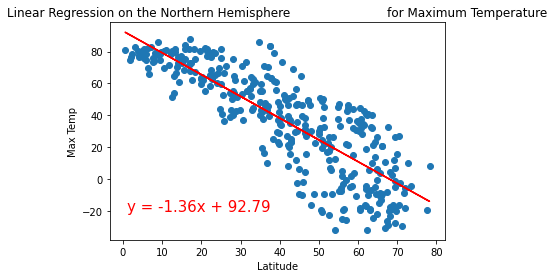

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,-20))

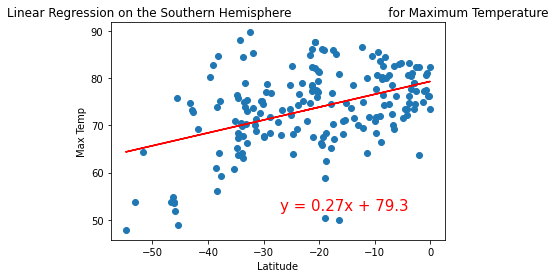

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-27,52))

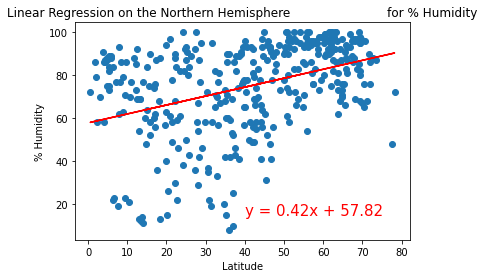

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,15))

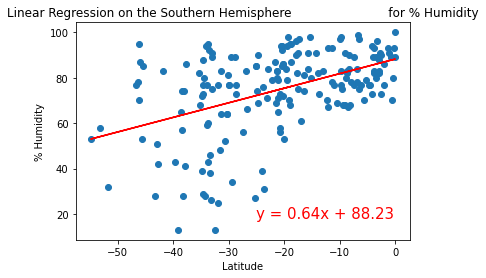

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,18))

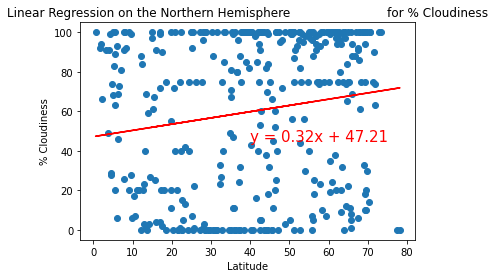

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,45))

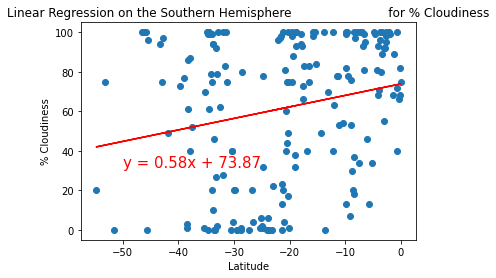

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,32))

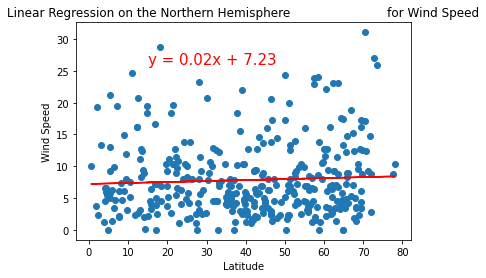

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(15,26))

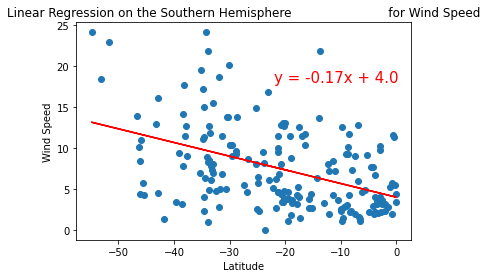

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,18))